In [1]:
import numpy as np

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

dataMat, labelMat = loadDataSet()
print(dataMat[0:5])
print(labelMat[0:5])

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677]]
[0, 1, 0, 0, 0]


In [2]:
npdataMat = np.array(dataMat)
print(npdataMat[:,0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


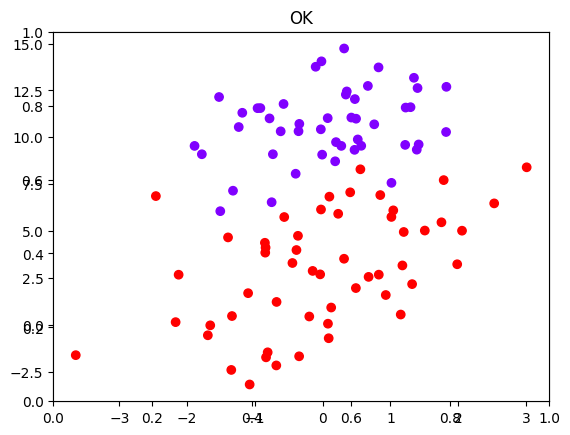

In [3]:
import matplotlib
import matplotlib.pyplot as plt
def labelsToColors(labels):
    # Crée un ensemble unique des étiquettes pour déterminer les classes
    uniqueLabels = np.unique(labels)
    # Génère des couleurs aléatoires pour chaque classe unique
    colors = plt.cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
    # Crée un dictionnaire pour mapper chaque étiquette à une couleur
    colorMap = {label: color for label, color in zip(uniqueLabels, colors)}
    # Mappe chaque étiquette dans l'ensemble original à une couleur
    return np.array([colorMap[label] for label in labels])

datingLabelsColors = labelsToColors(np.array(labelMat))
fig = plt.figure()
plt.title("OK")
ax = fig.add_subplot(111)
ax.scatter(npdataMat[:,1], npdataMat[:,2], c=datingLabelsColors)
plt.show()

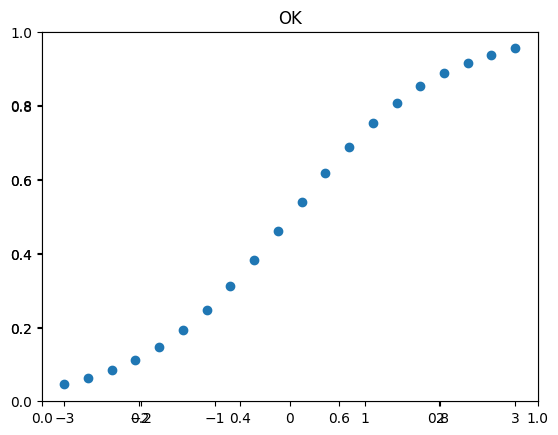

In [6]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))
result = [sigmoid(x) for x in np.linspace(-3, 3, 20)]
abc = [(x) for x in np.linspace(-3, 3, 20)]
fig = plt.figure()
plt.title("OK")
ax = fig.add_subplot(111)
ax.scatter(abc[:], result[:])
plt.show()

In [11]:
# Gradient Ascent Function
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.array(dataMatIn) 
    labelMat = np.array(classLabels).reshape(-1, 1)  # Ensure column vector
    m, n = dataMatrix.shape  # 100, 3
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    errors = []

    for k in range(maxCycles): 
        h = sigmoid(np.dot(dataMatrix, weights))  # Use np.dot for matrix multiplication
        error = (labelMat - h) 
        errors.append(np.sum(np.abs(error)))
        weights = weights + alpha * np.dot(dataMatrix.T, error)  # Matrix multiplication

    return weights, errors
weights, errors = gradAscent(dataMat, labelMat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


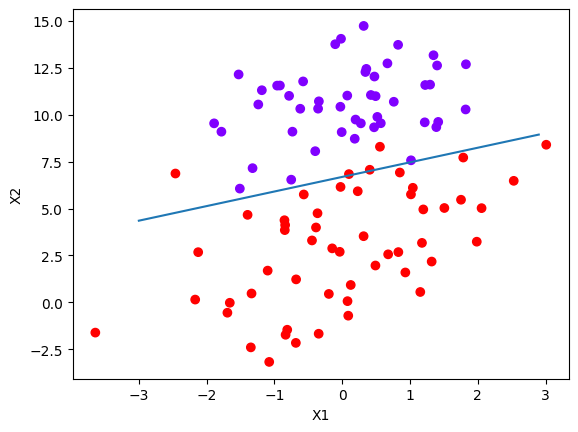

In [14]:
def plotBestFit(npdataMat, datingLabelsColors, weights):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(npdataMat[:,1], npdataMat[:,2], c=datingLabelsColors)
    x = np.arange(-3.0, 3.0, 0.1)
    arrayWeight = np.array(weights) #transform it in array else is still like a matrice
    y = (-arrayWeight[0]-arrayWeight[1]*x)/arrayWeight[2] 
    ax.plot(x,y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show() 
plotBestFit(npdataMat, datingLabelsColors, weights)

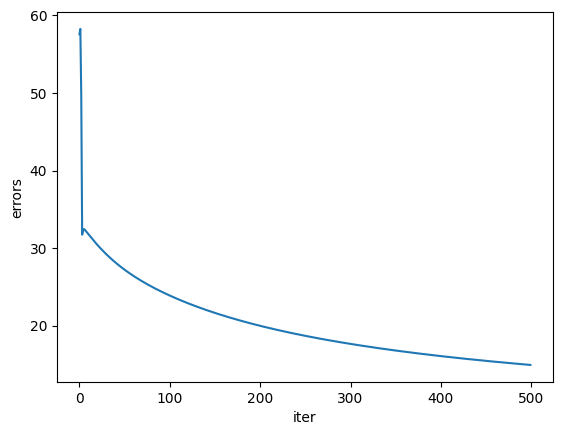

In [16]:
def plotErrors(errors, ylabel = "errors"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    numiterations = len(errors)
    x = np.arange(0, numiterations, 1)
    ax.plot(x,errors)
    plt.xlabel('iter')
    plt.ylabel(ylabel);
    plt.show() 

plotErrors(errors)

In [55]:
import random
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n) 
    errorStack = []          #log
    for i in range(m*5):
        #i = random.randint(0, m) # radon to avoid pattern
        tmp = sum(dataMatrix[i%m]*weights)
        h = sigmoid(tmp)
        error = classLabels[i%m] - h
        errorStack.append(abs(error))
        weights = weights + alpha * error * dataMatrix[i%m]
    return weights, errorStack
nvweight, errors = stocGradAscent0(npdataMat, labelMat)
print(nvweight)

[ 1.56520953  0.49236136 -0.38205668]


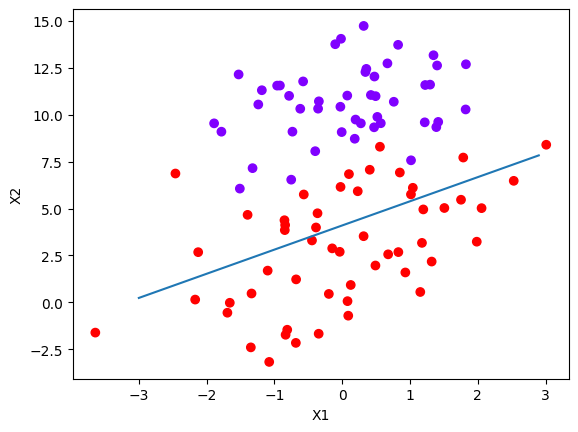

In [56]:
plotBestFit(npdataMat, datingLabelsColors, nvweight)


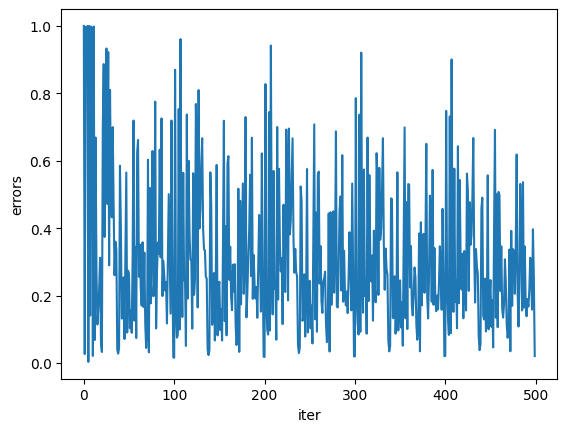

In [59]:
plotErrors(errors)

[ 6.42039135  0.66919736 -0.96121164]


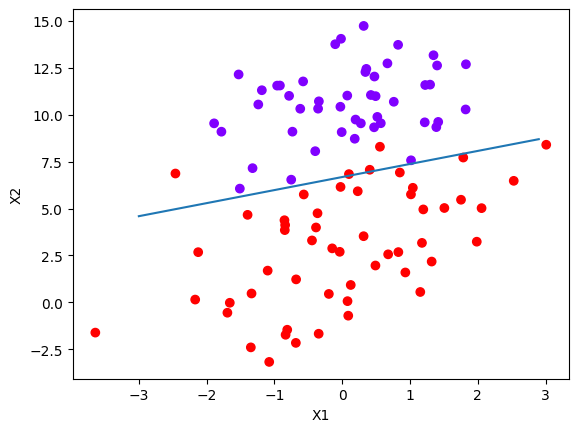

In [107]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
     m,n = np.shape(dataMatrix)
     weights = np.ones(n) 
     errorStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             error_sum = 0
             for i in range(m):
                 alpha = 0.01
                 randIndex = i
                 h = sigmoid(sum(dataMatrix[randIndex]*weights))
                 error = classLabels[randIndex] - h
                 error_sum += abs(error)
                 weights = weights + alpha * error * dataMatrix[randIndex]
             errorStack.append(error_sum/m)
     return weights, errorStack
nvweight, errorStack = stocGradAscent1(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)


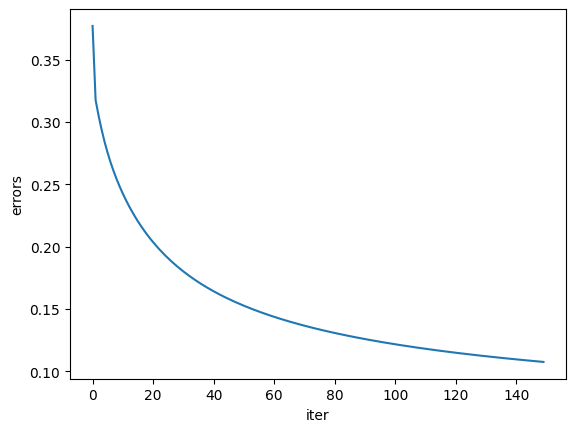

In [108]:
plotErrors(errorStack)

[15.54740137  1.23272371 -2.18652802]


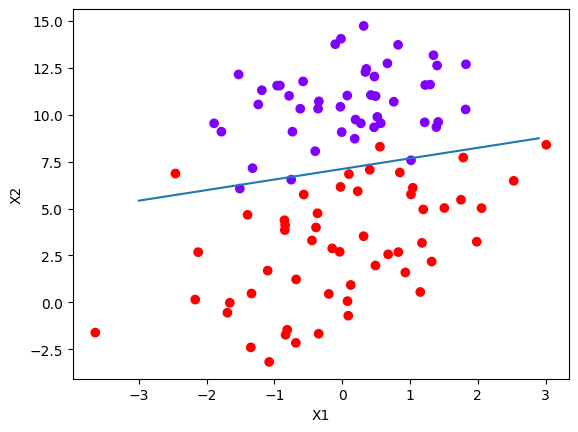

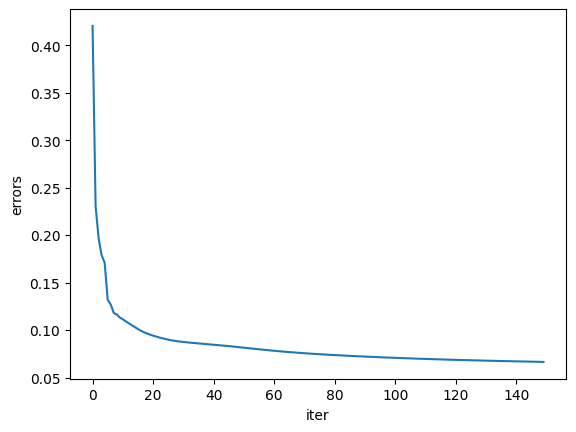

In [120]:
def stocGradAscent1_alpha(dataMatrix, classLabels, numIter=150):
     m,n = np.shape(dataMatrix)
     weights = np.ones(n) 
     errorStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             error_sum = 0
             for i in range(m):
                 alpha = 4/(1.0+j+i)+0.01 
                 randIndex = i
                 h = sigmoid(sum(dataMatrix[randIndex]*weights))
                 error = classLabels[randIndex] - h
                 error_sum += abs(error)
                 weights = weights + alpha * error * dataMatrix[randIndex]
             errorStack.append(error_sum/m)
     return weights, errorStack
nvweight, errorStack = stocGradAscent1_alpha(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotErrors(errorStack)

[13.45086537  1.15129168 -1.70311807]


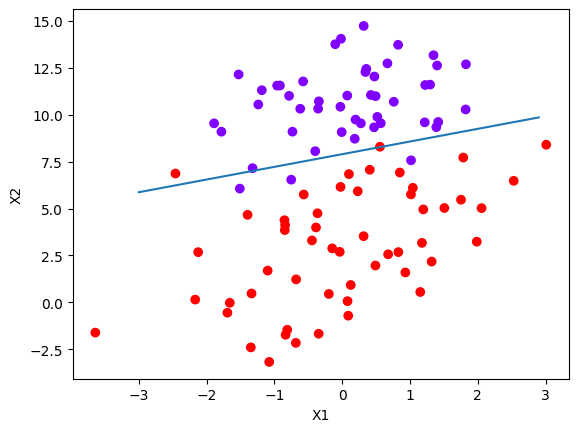

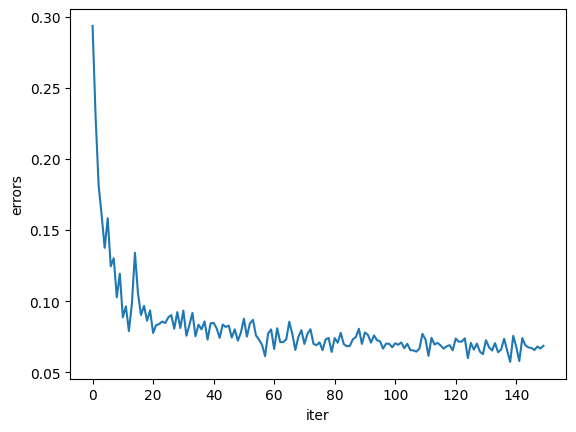

In [112]:
def stocGradAscent1_alpha_random_index(dataMatrix, classLabels, numIter=150):
     m,n = np.shape(dataMatrix)
     weights = np.ones(n) 
     errorStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             error_sum = 0
             for i in range(m):
                 alpha = 4/(1.0+j+i)+0.01 
                 randIndex = int(random.uniform(0,len(dataIndex))) 
                 index = dataIndex[randIndex]
                 h = sigmoid(sum(dataMatrix[index]*weights))
                 error = classLabels[index] - h
                 error_sum += abs(error)
                 weights = weights + alpha * error * dataMatrix[index]
                 del(dataIndex[randIndex])
             errorStack.append(error_sum / m)
     return weights, errorStack
nvweight, errorStack = stocGradAscent1_alpha_random_index(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotErrors(errorStack)

[165.31334557  18.50272775 -22.80535566]


C:\Users\PaulE\AppData\Local\Temp\ipykernel_33040\1850853274.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-inX))


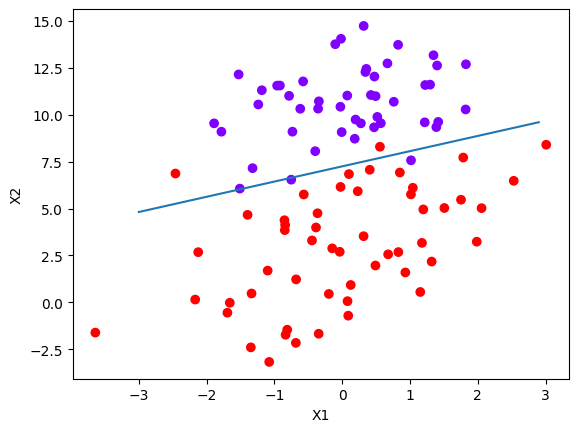

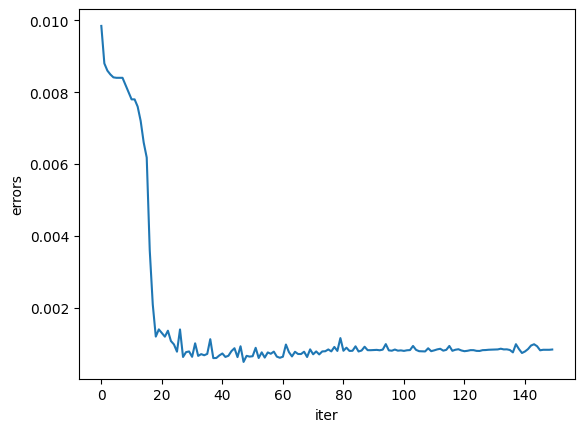

In [140]:
def miniBatchSGD(dataMatrix, classLabels, numIter=150, batch_size=50):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n) 
    errorStack = []
    m, n = dataMatrix.shape
    for j in range(numIter): 
        dataIndex = list(range(m))
        random.shuffle(dataIndex)
        error_sum = 0
        for i in range(0, m, batch_size):
            
            batch_indices = dataIndex[i:i + batch_size]
            batch_data = dataMatrix[batch_indices]
            batch_labels = classLabels[batch_indices]
            
            # Calculate prediction
            h = sigmoid(np.dot(batch_data, weights))
            error = batch_labels - h
            alpha = 4 / (1.0 + j + i) + 0.01  # Decaying learning rate
            error_sum += np.sum(np.abs(error)) / batch_size
            # Weight update using the mini-batch
            weights = weights + alpha * np.dot(batch_data.T, error)
            
        errorStack.append(error_sum/m)

    return weights, errorStack

nvweight, errorStack = miniBatchSGD(npdataMat, np.array(labelMat))
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotErrors(errorStack)